## Sentiment Analysis of Financial News

### This data represents a historical news archive for the last 12 years of the US equities publicly traded on NYSE/NASDAQ which still has a price higher than 10$ per share collected from investing.com, an online data and news website that provides financial information.

In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
# Read in data
df = pd.read_csv('webarticles_2017-2022.csv')

In [5]:
display(df.head())
display(df.tail())

,id,ticker,title,category,content,release_date,provider,url,article_id
0,238212.0,FCX,2016 Year End Review And Forward Analysis For ...,opinion,As always I provide no predictions or forecas...,1/1/2017,Jack Chan,https://www.investing.com/analysis/2016-year-e...,200171197.0
1,253057.0,MSFT,U S intel expert says Russians weaponized e...,news,Investing com The rhetorical war between th...,1/1/2017,Investing.com,https://www.investing.com/news/world-news/u.s....,450653.0
2,263229.0,BAC,Financial Crash Fallout Continues U S Sues B...,opinion,If you saw your Barclays LON BARC stock take...,1/1/2017,Modest Money,https://www.investing.com/analysis/financial-c...,200171173.0
3,287750.0,AAPL,2016 From A 10 000 Foot View,opinion,VanEck Vectors Semiconductor NYSE SMH Semi...,1/1/2017,Ivaylo Ivanhoff,https://www.investing.com/analysis/2016-from-a...,200171169.0
4,287751.0,AAPL,Apple Stock Here s Why It s Falling,opinion,Apple Inc NASDAQ AAPL \nApple isn t having th...,1/1/2017,Modest Money,https://www.investing.com/analysis/apple-(aapl...,200171172.0


,id,ticker,title,category,content,release_date,provider,url,article_id
194863,NaN,NaN,6:10 AM ET,NaN,NaN,8/24/2022,NaN,NaN,NaN
194864,NaN,NaN,Bed Bath & Beyond Stock Surges on Report It Se...,NaN,NaN,8/24/2022,NaN,NaN,NaN
194865,NaN,NaN,Commentary: An $80 Billion Sea Change at the IRS,NaN,NaN,8/24/2022,NaN,NaN,NaN
194866,NaN,NaN,Paying Dividends: Energy Companies Dominate To...,NaN,NaN,8/24/2022,NaN,NaN,NaN
194867,NaN,NaN,The SEC Sets Its Sights on Mutual Fund Fees,NaN,NaN,8/24/2022,NaN,NaN,NaN


In [6]:
#downloading the vader lexicon from nltk
import nltk
nltk.download('vader_lexicon')
#importing sentimentintensityanaylzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\WilsonRosa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## VADER Scores Based on Article Title

In [7]:
# VADER scores based on title
df['VADER Scores'] = df['title'].apply(lambda text: sid.polarity_scores(text))
df.head(10)

,id,ticker,title,category,content,release_date,provider,url,article_id,VADER Scores
0,238212.0,FCX,2016 Year End Review And Forward Analysis For ...,opinion,As always I provide no predictions or forecas...,1/1/2017,Jack Chan,https://www.investing.com/analysis/2016-year-e...,200171197.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,253057.0,MSFT,U S intel expert says Russians weaponized e...,news,Investing com The rhetorical war between th...,1/1/2017,Investing.com,https://www.investing.com/news/world-news/u.s....,450653.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,263229.0,BAC,Financial Crash Fallout Continues U S Sues B...,opinion,If you saw your Barclays LON BARC stock take...,1/1/2017,Modest Money,https://www.investing.com/analysis/financial-c...,200171173.0,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp..."
3,287750.0,AAPL,2016 From A 10 000 Foot View,opinion,VanEck Vectors Semiconductor NYSE SMH Semi...,1/1/2017,Ivaylo Ivanhoff,https://www.investing.com/analysis/2016-from-a...,200171169.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,287751.0,AAPL,Apple Stock Here s Why It s Falling,opinion,Apple Inc NASDAQ AAPL \nApple isn t having th...,1/1/2017,Modest Money,https://www.investing.com/analysis/apple-(aapl...,200171172.0,"{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'comp..."
5,295298.0,TSLA,Here s What I m Thinking About Asset Allocatio...,opinion,With all thy getting get understanding Pro...,1/1/2017,Brian Gilmartin,https://www.investing.com/analysis/thinking-ab...,200171144.0,"{'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'comp..."
6,296611.0,TSLA,Tesla owner files lawsuit in California claimi...,news,SAN FRANCISCO Reuters Tesla Motors Inc ...,1/1/2017,Reuters,https://www.investing.com/news/stock-market-ne...,450619.0,"{'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'comp..."
7,331036.0,BLK,10 Undervalued Companies For The Defensive Div...,opinion,There are a number of great companies in the m...,1/1/2017,ValueWalk,https://www.investing.com/analysis/10-underval...,200171179.0,"{'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'comp..."
8,335648.0,CAKE,From A Roar To Caution The S P 500 Tentativel...,opinion,T2108 Status 64 5 T2107 Status 63 5 VIX Stat...,1/1/2017,Dr. Duru,https://www.investing.com/analysis/from-a-roar...,200171175.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
9,393258.0,UPS,Weighing the Week Ahead Has The Santa Rally B...,opinion,2017 begins with plenty of economic data cramm...,1/1/2017,Jeff Miller,https://www.investing.com/analysis/weighing-th...,200171149.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [8]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.6:
        return "Extremely Bullish"
    elif sentiment['compound'] >= 0.2 and sentiment['compound'] < 0.6: 
        return "Bullish"
    elif sentiment['compound'] <= -0.2 and sentiment['compound'] > -0.6: 
        return "Bearish"
    elif sentiment['compound'] <= -0.6: 
        return "Extremely Bearish"
    else:
        return "Neutral"

final_df = df
final_df['Sentiment'] = df['VADER Scores'].apply(lambda x: sentimentPredict(x))

display(final_df.head())
display(final_df.tail())

,id,ticker,title,category,content,release_date,provider,url,article_id,VADER Scores,Sentiment
0,238212.0,FCX,2016 Year End Review And Forward Analysis For ...,opinion,As always I provide no predictions or forecas...,1/1/2017,Jack Chan,https://www.investing.com/analysis/2016-year-e...,200171197.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,253057.0,MSFT,U S intel expert says Russians weaponized e...,news,Investing com The rhetorical war between th...,1/1/2017,Investing.com,https://www.investing.com/news/world-news/u.s....,450653.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
2,263229.0,BAC,Financial Crash Fallout Continues U S Sues B...,opinion,If you saw your Barclays LON BARC stock take...,1/1/2017,Modest Money,https://www.investing.com/analysis/financial-c...,200171173.0,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...",Bearish
3,287750.0,AAPL,2016 From A 10 000 Foot View,opinion,VanEck Vectors Semiconductor NYSE SMH Semi...,1/1/2017,Ivaylo Ivanhoff,https://www.investing.com/analysis/2016-from-a...,200171169.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,287751.0,AAPL,Apple Stock Here s Why It s Falling,opinion,Apple Inc NASDAQ AAPL \nApple isn t having th...,1/1/2017,Modest Money,https://www.investing.com/analysis/apple-(aapl...,200171172.0,"{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'comp...",Neutral


,id,ticker,title,category,content,release_date,provider,url,article_id,VADER Scores,Sentiment
194863,NaN,NaN,6:10 AM ET,NaN,NaN,8/24/2022,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
194864,NaN,NaN,Bed Bath & Beyond Stock Surges on Report It Se...,NaN,NaN,8/24/2022,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",Bullish
194865,NaN,NaN,Commentary: An $80 Billion Sea Change at the IRS,NaN,NaN,8/24/2022,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
194866,NaN,NaN,Paying Dividends: Energy Companies Dominate To...,NaN,NaN,8/24/2022,NaN,NaN,NaN,"{'neg': 0.174, 'neu': 0.581, 'pos': 0.244, 'co...",Neutral
194867,NaN,NaN,The SEC Sets Its Sights on Mutual Fund Fees,NaN,NaN,8/24/2022,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


In [9]:
def sentimentPredict(sentiment):
    if sentiment['compound'] >= 0.0:
        return sentiment['compound']
    else:
        return sentiment['compound']

final_df_score = df
final_df_score['Compound Score'] = df['VADER Scores'].apply(lambda x: sentimentPredict(x))

display(final_df_score.head())
display(final_df_score.tail())

,id,ticker,title,category,content,release_date,provider,url,article_id,VADER Scores,Sentiment,Compound Score
0,238212.0,FCX,2016 Year End Review And Forward Analysis For ...,opinion,As always I provide no predictions or forecas...,1/1/2017,Jack Chan,https://www.investing.com/analysis/2016-year-e...,200171197.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
1,253057.0,MSFT,U S intel expert says Russians weaponized e...,news,Investing com The rhetorical war between th...,1/1/2017,Investing.com,https://www.investing.com/news/world-news/u.s....,450653.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
2,263229.0,BAC,Financial Crash Fallout Continues U S Sues B...,opinion,If you saw your Barclays LON BARC stock take...,1/1/2017,Modest Money,https://www.investing.com/analysis/financial-c...,200171173.0,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...",Bearish,-0.4019
3,287750.0,AAPL,2016 From A 10 000 Foot View,opinion,VanEck Vectors Semiconductor NYSE SMH Semi...,1/1/2017,Ivaylo Ivanhoff,https://www.investing.com/analysis/2016-from-a...,200171169.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
4,287751.0,AAPL,Apple Stock Here s Why It s Falling,opinion,Apple Inc NASDAQ AAPL \nApple isn t having th...,1/1/2017,Modest Money,https://www.investing.com/analysis/apple-(aapl...,200171172.0,"{'neg': 0.242, 'neu': 0.758, 'pos': 0.0, 'comp...",Neutral,-0.1531


,id,ticker,title,category,content,release_date,provider,url,article_id,VADER Scores,Sentiment,Compound Score
194863,NaN,NaN,6:10 AM ET,NaN,NaN,8/24/2022,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
194864,NaN,NaN,Bed Bath & Beyond Stock Surges on Report It Se...,NaN,NaN,8/24/2022,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.816, 'pos': 0.184, 'comp...",Bullish,0.4019
194865,NaN,NaN,Commentary: An $80 Billion Sea Change at the IRS,NaN,NaN,8/24/2022,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000
194866,NaN,NaN,Paying Dividends: Energy Companies Dominate To...,NaN,NaN,8/24/2022,NaN,NaN,NaN,"{'neg': 0.174, 'neu': 0.581, 'pos': 0.244, 'co...",Neutral,0.1531
194867,NaN,NaN,The SEC Sets Its Sights on Mutual Fund Fees,NaN,NaN,8/24/2022,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral,0.0000


C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

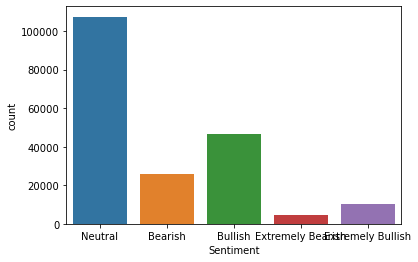

In [67]:
import seaborn as sns
sns.countplot(final_df['Sentiment'], label='count')

In [68]:
final_df_score.to_csv("news_sentiment.csv")

In [73]:
df_scores = pd.read_csv('news_sentiment_scores.csv')

In [74]:
df_scores.set_index("release_date", inplace = True)
display(df_scores.head())
display(df_scores.tail())

,Average Daily Compound Score,Average Daily Compound Score ex 0s,Sum Composite Score,VIX,VIX x .01,VIX x .001
release_date,,,,,,
1/1/2017,-0.040,-0.064,-0.644,12.85,0.1285,0.01285
1/2/2017,0.024,0.045,0.357,12.85,0.1285,0.01285
1/3/2017,0.012,0.022,0.463,12.85,0.1285,0.01285
1/4/2017,0.029,0.063,1.580,11.85,0.1185,0.01185
1/5/2017,-0.027,-0.049,-1.633,11.67,0.1167,0.01167


,Average Daily Compound Score,Average Daily Compound Score ex 0s,Sum Composite Score,VIX,VIX x .01,VIX x .001
release_date,,,,,,
8/20/2022,-0.130,-0.173,-0.519,20.600000,0.2060,0.02060
8/21/2022,0.196,0.294,1.175,20.600000,0.2060,0.02060
8/22/2022,-0.026,-0.053,-1.158,23.799999,0.2380,0.02380
8/23/2022,-0.025,-0.039,-1.261,24.110001,0.2411,0.02411
8/24/2022,0.007,0.012,0.410,24.110001,0.2411,0.02411


In [76]:
df_scores_correlation = df_scores.drop(['VIX x .01', 'VIX x .001'], axis=1)
df_scores_correlation

,Average Daily Compound Score,Average Daily Compound Score ex 0s,Sum Composite Score,VIX
release_date,,,,
1/1/2017,-0.040,-0.064,-0.644,12.850000
1/2/2017,0.024,0.045,0.357,12.850000
1/3/2017,0.012,0.022,0.463,12.850000
1/4/2017,0.029,0.063,1.580,11.850000
1/5/2017,-0.027,-0.049,-1.633,11.670000
...,...,...,...,...
8/20/2022,-0.130,-0.173,-0.519,20.600000
8/21/2022,0.196,0.294,1.175,20.600000
8/22/2022,-0.026,-0.053,-1.158,23.799999


In [79]:
df_scores_correlation.corr()

,Average Daily Compound Score,Average Daily Compound Score ex 0s,Sum Composite Score,VIX
Average Daily Compound Score,1.000000,0.931517,0.492643,-0.179281
Average Daily Compound Score ex 0s,0.931517,1.000000,0.415897,-0.146835
Sum Composite Score,0.492643,0.415897,1.000000,-0.329273
VIX,-0.179281,-0.146835,-0.329273,1.000000


<AxesSubplot:xlabel='release_date'>

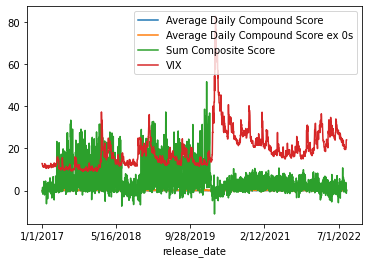

In [81]:
df_scores_correlation.plot()

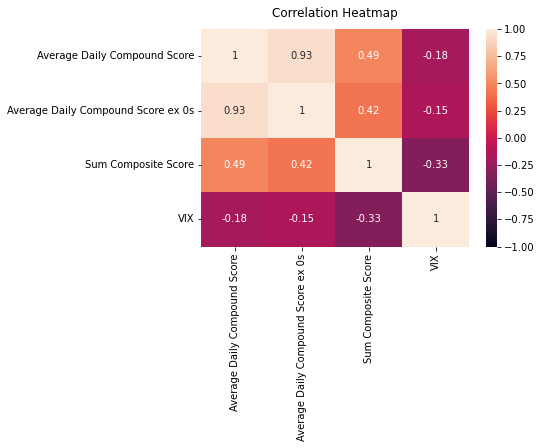

In [80]:
heatmap = sns.heatmap(df_scores_correlation.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [17]:
df_scores_ex0s = df_scores.drop(['Average Daily Compound Score', 'Sum Composite Score', 'VIX', 'VIX x .001'], axis=1)
df_scores_ex0s

,Average Daily Compound Score ex 0s,VIX x .01
release_date,,
1/1/2017,-0.064,0.1285
1/2/2017,0.045,0.1285
1/3/2017,0.022,0.1285
1/4/2017,0.063,0.1185
1/5/2017,-0.049,0.1167
...,...,...
8/20/2022,-0.173,0.2060
8/21/2022,0.294,0.2060
8/22/2022,-0.053,0.2380


<AxesSubplot:xlabel='release_date'>

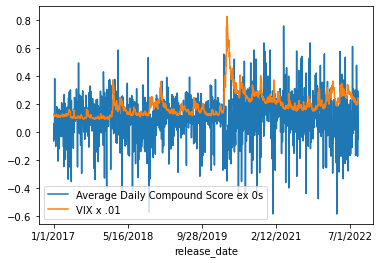

In [18]:
df_scores_ex0s.plot()

In [19]:
df_sum = df_scores.drop(['Average Daily Compound Score', 'Average Daily Compound Score ex 0s', 'VIX x .01', 'VIX x .001'], axis=1)
df_sum 

,Sum Composite Score,VIX
release_date,,
1/1/2017,-0.644,12.850000
1/2/2017,0.357,12.850000
1/3/2017,0.463,12.850000
1/4/2017,1.580,11.850000
1/5/2017,-1.633,11.670000
...,...,...
8/20/2022,-0.519,20.600000
8/21/2022,1.175,20.600000
8/22/2022,-1.158,23.799999


<AxesSubplot:xlabel='release_date'>

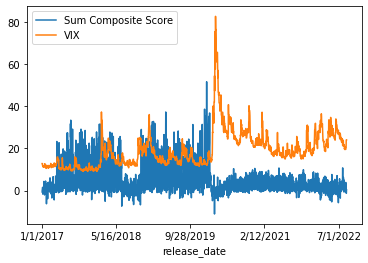

In [20]:
df_sum.plot()

In [56]:
from sklearn.preprocessing import StandardScaler
# define data
data = df_scores_correlation
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[-1.36258884 -1.21043794 -0.88094127 -0.72964315]
 [-0.41076902 -0.41524068 -0.74769248 -0.72964315]
 [-0.58923524 -0.5830346  -0.73358221 -0.72964315]
 ...
 [-1.15437826 -1.13018867 -0.94936272  0.544517  ]
 [-1.13950607 -1.02805325 -0.96307364  0.58058935]
 [-0.66359616 -0.65598848 -0.74063734  0.58058935]]


In [57]:
df_scaled = pd.DataFrame(scaled)
df_scaled_2 = df_scaled.rename(columns={"0": "Average Daily Compound Score", "1": "Average Daily Compound Score ex 0s", "2": "Sum Composite Score", "3": "VIX","4": "VIX x .01", "5": "VIX x .001"})
df_scaled_2

,0,1,2,3
0,-1.362589,-1.210438,-0.880941,-0.729643
1,-0.410769,-0.415241,-0.747692,-0.729643
2,-0.589235,-0.583035,-0.733582,-0.729643
3,-0.336408,-0.283924,-0.584892,-0.846005
4,-1.169250,-1.101007,-1.012593,-0.866950
...,...,...,...,...
2050,-2.701085,-2.005635,-0.864302,0.172160
2051,2.147247,1.401311,-0.638804,0.172160
2052,-1.154378,-1.130189,-0.949363,0.544517
2053,-1.139506,-1.028053,-0.963074,0.580589


<AxesSubplot:>

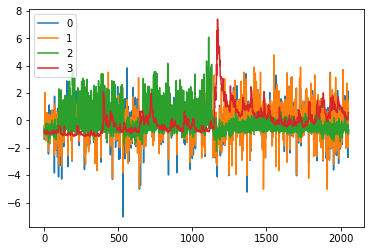

In [59]:
df_scaled_2.plot()

## TO BE CONTINUED Naive Bayes

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
# Multinomial Naive Bayes is appro
# continuous Gaussian distribution(parameters are only mean and variance).
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import Pipeline
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\WilsonRosa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WilsonRosa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\WilsonRosa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [66]:
# Read in data
df_2 = pd.read_csv('webarticles_2017-2020.csv')
df_2["label"] = 0
display(df_2.head())
display(df_2.tail())

,id,ticker,title,category,content,release_date,provider,url,article_id,label
0,238212,FCX,2016 Year End Review And Forward Analysis For ...,opinion,As always I provide no predictions or forecas...,1/1/2017,Jack Chan,https://www.investing.com/analysis/2016-year-e...,200171197,0
1,253057,MSFT,U S intel expert says Russians weaponized e...,news,Investing com The rhetorical war between th...,1/1/2017,Investing.com,https://www.investing.com/news/world-news/u.s....,450653,0
2,263229,BAC,Financial Crash Fallout Continues U S Sues B...,opinion,If you saw your Barclays LON BARC stock take...,1/1/2017,Modest Money,https://www.investing.com/analysis/financial-c...,200171173,0
3,287750,AAPL,2016 From A 10 000 Foot View,opinion,VanEck Vectors Semiconductor NYSE SMH Semi...,1/1/2017,Ivaylo Ivanhoff,https://www.investing.com/analysis/2016-from-a...,200171169,0
4,287751,AAPL,Apple Stock Here s Why It s Falling,opinion,Apple Inc NASDAQ AAPL \nApple isn t having th...,1/1/2017,Modest Money,https://www.investing.com/analysis/apple-(aapl...,200171172,0


,id,ticker,title,category,content,release_date,provider,url,article_id,label
151283,441546,T,Why T Mobile s deal with Sprint could be the w...,news,T Mobile s deal with Sprint may usher in the n...,2/13/2020,CNBC,https://invst.ly/pubux,2083207,0
151284,441657,T,Telecom Stock Roundup T Mobile Sprint Merger ...,opinion,In the past five trading days telecom stocks ...,2/13/2020,Zacks Investment Research,https://www.investing.com/analysis/telecom-sto...,200507205,0
151285,441658,T,3 Top Dividend Stocks To Maximize Your Retirem...,opinion,Strange but true seniors fear death less than...,2/13/2020,Zacks Investment Research,https://www.investing.com/analysis/3-top-divid...,200507295,0
151286,441659,T,Improve Your Retirement Income With These 3 To...,opinion,Here s a revealing data point older Americans...,2/13/2020,Zacks Investment Research,https://www.investing.com/analysis/improve-you...,200507294,0
151287,441918,AMD,Coronavirus Fears Re Emerge Bringing Risk Off...,opinion,Thursday Market Open Anyone who went to bed ...,2/13/2020,JJ Kinahan,https://www.investing.com/analysis/coronavirus...,200507284,0


In [67]:
# Create a and run a data processing Pipeline
def data_cleaning(text_list): 
    stopwords_rem=False
    stopwords_en=stopwords.words('english')
    lemmatizer=WordNetLemmatizer()
    tokenizer=TweetTokenizer()
    reconstructed_list=[]
    for each_text in text_list: 
        lemmatized_tokens=[]
        tokens=tokenizer.tokenize(each_text.lower())
        pos_tags=pos_tag(tokens)
        for each_token, tag in pos_tags: 
            if tag.startswith('NN'): 
                pos='n'
            elif tag.startswith('VB'): 
                pos='v'
            else: 
                pos='a'
            lemmatized_token=lemmatizer.lemmatize(each_token, pos)
            if stopwords_rem: # False 
                if lemmatized_token not in stopwords_en: 
                    lemmatized_tokens.append(lemmatized_token)
            else: 
                lemmatized_tokens.append(lemmatized_token)
        reconstructed_list.append(' '.join(lemmatized_tokens))
    return reconstructed_list

estimators=[('cleaner', FunctionTransformer(data_cleaning)), 
            ('vectorizer', TfidfVectorizer(max_features=100000, ngram_range=(1, 2)))]
preprocessing_pipeline=Pipeline(estimators)

In [68]:
# Break data down into a training set and a testing set
X=df_2['title']
y=df_2['label']
X_train, X_test, y_train, y_test=train_test_split(X, y)

# Fit and transform the pipeline
X_train_transformed=preprocessing_pipeline.fit_transform(X_train)

# Create a Naive Bayes model and fit training data
nb=MultinomialNB()
nb.fit(X_train_transformed, y_train)
X_test_transformed=preprocessing_pipeline.transform(X_test)

# Evaluate model
print(f'Test Score: {nb.score(X_test_transformed, y_test)}')
print(f'Test Score: {nb.score(X_train_transformed, y_train)}')

Test Score: 1.0
Test Score: 1.0


## Deep Learning LSTM

In [64]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils.data_utils import pad_sequences
from tensorflow.keras.utils import to_categorical
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers

In [69]:
# Read in data
df_3 = pd.read_csv('webarticles_2017-2020.csv')
df_3["label"] = 0
display(df_2.head())
display(df_2.tail())

,id,ticker,title,category,content,release_date,provider,url,article_id,label
0,238212,FCX,2016 Year End Review And Forward Analysis For ...,opinion,As always I provide no predictions or forecas...,1/1/2017,Jack Chan,https://www.investing.com/analysis/2016-year-e...,200171197,0
1,253057,MSFT,U S intel expert says Russians weaponized e...,news,Investing com The rhetorical war between th...,1/1/2017,Investing.com,https://www.investing.com/news/world-news/u.s....,450653,0
2,263229,BAC,Financial Crash Fallout Continues U S Sues B...,opinion,If you saw your Barclays LON BARC stock take...,1/1/2017,Modest Money,https://www.investing.com/analysis/financial-c...,200171173,0
3,287750,AAPL,2016 From A 10 000 Foot View,opinion,VanEck Vectors Semiconductor NYSE SMH Semi...,1/1/2017,Ivaylo Ivanhoff,https://www.investing.com/analysis/2016-from-a...,200171169,0
4,287751,AAPL,Apple Stock Here s Why It s Falling,opinion,Apple Inc NASDAQ AAPL \nApple isn t having th...,1/1/2017,Modest Money,https://www.investing.com/analysis/apple-(aapl...,200171172,0


,id,ticker,title,category,content,release_date,provider,url,article_id,label
151283,441546,T,Why T Mobile s deal with Sprint could be the w...,news,T Mobile s deal with Sprint may usher in the n...,2/13/2020,CNBC,https://invst.ly/pubux,2083207,0
151284,441657,T,Telecom Stock Roundup T Mobile Sprint Merger ...,opinion,In the past five trading days telecom stocks ...,2/13/2020,Zacks Investment Research,https://www.investing.com/analysis/telecom-sto...,200507205,0
151285,441658,T,3 Top Dividend Stocks To Maximize Your Retirem...,opinion,Strange but true seniors fear death less than...,2/13/2020,Zacks Investment Research,https://www.investing.com/analysis/3-top-divid...,200507295,0
151286,441659,T,Improve Your Retirement Income With These 3 To...,opinion,Here s a revealing data point older Americans...,2/13/2020,Zacks Investment Research,https://www.investing.com/analysis/improve-you...,200507294,0
151287,441918,AMD,Coronavirus Fears Re Emerge Bringing Risk Off...,opinion,Thursday Market Open Anyone who went to bed ...,2/13/2020,JJ Kinahan,https://www.investing.com/analysis/coronavirus...,200507284,0


In [70]:
# Create all the features to the data set
def data_cleaning(text_list): 
    stopwords_rem=False
    stopwords_en=stopwords.words('english')
    lemmatizer=WordNetLemmatizer()
    tokenizer=TweetTokenizer()
    reconstructed_list=[]
    for each_text in text_list: 
        lemmatized_tokens=[]
        tokens=tokenizer.tokenize(each_text.lower())
        pos_tags=pos_tag(tokens)
        for each_token, tag in pos_tags: 
            if tag.startswith('NN'): 
                pos='n'
            elif tag.startswith('VB'): 
                pos='v'
            else: 
                pos='a'
            lemmatized_token=lemmatizer.lemmatize(each_token, pos)
            if stopwords_rem: # False 
                if lemmatized_token not in stopwords_en: 
                    lemmatized_tokens.append(lemmatized_token)
            else: 
                lemmatized_tokens.append(lemmatized_token)
        reconstructed_list.append(' '.join(lemmatized_tokens))
    return reconstructed_list

In [71]:
# Break data down into a training set and a testing set
X=df_3['title']
y=df_3['label']
X_train, X_test, y_train, y_test=train_test_split(X, y)

In [72]:
# Fit and transform the data
X_train=data_cleaning(X_train)
X_test=data_cleaning(X_test)
tokenizer=Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size=len(tokenizer.word_index)+1

print(f'Vocab Size: {vocab_size}')
X_train=pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=40)
X_test=pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=40)
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

Vocab Size: 28372


In [73]:
# Create an LSTM model with an Embedding layer and fit training data
model=Sequential()
model.add(layers.Embedding(input_dim=vocab_size,\
                           output_dim=100,\
                           input_length=40))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dense(2,activation='softmax'))
model.compile(optimizer='adam',\
              loss='categorical_crossentropy',\
              metrics=['accuracy'])
model.fit(X_train,\
          y_train,\
          batch_size=256,\
          epochs=20,\
          validation_data=(X_test,y_test))

Epoch 1/20


ValueError: in user code:

    File "C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\keras\engine\training.py", line 949, in compute_loss
        y, y_pred, sample_weight, regularization_losses=self.losses)
    File "C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\keras\losses.py", line 1788, in categorical_crossentropy
        y_true, y_pred, from_logits=from_logits, axis=axis)
    File "C:\Users\WilsonRosa\anaconda3\envs\dev\envs\dev\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


In [10]:
df_5 = pd.read_csv('barrons2020.csv')

In [11]:
display(df_5.head())
display(df_5.tail())

,"Article Archive For January 5, 2020","Article Archive For January 6, 2020","Article Archive For January 7, 2020","Article Archive For January 8, 2020","Article Archive For January 9, 2020","Article Archive For January 10, 2020","Article Archive For January 11, 2020","Article Archive For January 12, 2020","Article Archive For January 13, 2020","Article Archive For January 14, 2020",...,"Article Archive For December 22, 2020","Article Archive For December 23, 2020","Article Archive For December 24, 2020","Article Archive For December 25, 2020","Article Archive For December 26, 2020","Article Archive For December 27, 2020","Article Archive For December 28, 2020","Article Archive For December 29, 2020","Article Archive For December 30, 2020","Article Archive For December 31, 2020"
0,TECHNOLOGY,TECHNOLOGY,TECHNOLOGY,MARKETS,NEWS,MARKETS,INVESTING,INDUSTRIALS,INDUSTRIALS,MARKETS,...,CORONAVIRUS,TECHNOLOGY,MEDIA,Great Escapes: How Interior Designer Robert Co...,POLITICS,"New Year’s Closings, Housing Data, Tiffany Vot...",Jay Clayton Has Left the SEC. What to Expect U...,ASIA,MANUFACTURING,ECONOMY & POLICY
1,U.S. Consumer Tech Sales Projected to Increase...,Intel Offers Peek at New Tiger Lake Processors...,"Facebook, Apple, and the FTC Talked Privacy at...",The Dow Rose 161 Points Because President Trum...,The Ukrainian Jet Might Have Been Shot Down by...,The S&P 500 Gained Almost 28% in 2019. Here’s ...,Stocks Are Extremely Expensive Right Now. Wher...,Woodward and Hexcel Surprised Investors With a...,Boeing Was Just Put on Credit Watch for a Down...,The Dow Rose 37 Points Because the China Trade...,...,Futures Fall Slightly After Trump Calls for Ma...,Cloudera Buys Out Intel’s Stake. Here’s What I...,FuboTV Stock Plunges as Analyst Cites ‘Egregio...,6:49 AM ET,Stimulus Bill’s Fate Remains in Limbo,3:00 PM ET,6:10 PM ET,Japanese Stocks Are Soaring. What’s Behind the...,Caterpillar Had Quite a Year. 2021 Looks Better.,Sluggish U.S. Population Growth Bodes Poorly f...
2,8:27 PM ET,9:11 PM ET,9:56 PM ET,5:22 PM ET,7:39 PM ET,10:15 PM ET,6:46 PM ET,7:34 PM ET,8:14 PM ET,5:44 PM ET,...,8:31 PM ET,8:21 PM ET,9:45 PM ET,IPOS,3:08 PM ET,BIOTECH AND PHARMA,The Infiniti QX80 SUV Is Top of the Line Luxury,10:14 PM ET,6:03 PM ET,8:15 PM ET
3,CONSUMER,MARKETS,INVESTING,Armand Rousseau Was the Best-Performing Fine W...,A ‘Dream’ Collection of 114 Classic Cars to be...,US,ECONOMY AND POLICY,"JPMorgan Chase, Goldman Sachs, Delta, and Othe...",FINANCIALS,Sotheby’s to Auction Three Works Restituted to...,...,ENERGY,CRYPTOCURRENCIES,TECHNOLOGY,A New Way for Companies to Go Public Won’t Nec...,CHINA,What’s Ahead for Amgen Stock Next Year,5:25 PM ET,TELECOM,MARKETS,Why BlackRock Stock Will Continue to Rock
4,P&G Kicks Off CES With a Robot That Fetches To...,The Dow Added 69 Points Because Geopolitics Ca...,Iran Attacked U.S. and Iraqi Bases. Investors ...,4:08 PM ET,6:14 PM ET,The Trump Market Thunders On,"Trump Looks Likely to Win Reelection, Investin...",3:00 PM ET,Brinker Capital Is Up for Sale,5:32 PM ET,...,Renewable Energy Stocks Should Thrive on Stimu...,Trump Administration’s Shift in Tone Shakes Cr...,Wall Street Seeks the Upside in an Historic Hack,6:00 AM ET,China’s Crackdown on Alibaba Probably Won’t St...,4:30 AM ET,BANKS,Verizon Stock Did Nothing in 2020. It Needs to...,Dow Jones Industrial Average Hits Record High ...,7:31 PM ET


,"Article Archive For January 5, 2020","Article Archive For January 6, 2020","Article Archive For January 7, 2020","Article Archive For January 8, 2020","Article Archive For January 9, 2020","Article Archive For January 10, 2020","Article Archive For January 11, 2020","Article Archive For January 12, 2020","Article Archive For January 13, 2020","Article Archive For January 14, 2020",...,"Article Archive For December 22, 2020","Article Archive For December 23, 2020","Article Archive For December 24, 2020","Article Archive For December 25, 2020","Article Archive For December 26, 2020","Article Archive For December 27, 2020","Article Archive For December 28, 2020","Article Archive For December 29, 2020","Article Archive For December 30, 2020","Article Archive For December 31, 2020"
387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_5.dropna()
display(df_5.head())
display(df_5.tail())

,"Article Archive For January 5, 2020","Article Archive For January 6, 2020","Article Archive For January 7, 2020","Article Archive For January 8, 2020","Article Archive For January 9, 2020","Article Archive For January 10, 2020","Article Archive For January 11, 2020","Article Archive For January 12, 2020","Article Archive For January 13, 2020","Article Archive For January 14, 2020",...,Unnamed: 501,"Article Archive For December 27, 2020",Unnamed: 503,"Article Archive For December 28, 2020",Unnamed: 505,"Article Archive For December 29, 2020",Unnamed: 507,"Article Archive For December 30, 2020",Unnamed: 509,"Article Archive For December 31, 2020"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NEWS,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,The Ukrainian Jet Might Have Been Shot Down by...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,7:39 PM ET,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TECHNOLOGY,TECHNOLOGY,TECHNOLOGY,MARKETS,NaN,MARKETS,INVESTING,INDUSTRIALS,INDUSTRIALS,MARKETS,...,NaN,"New Year’s Closings, Housing Data, Tiffany Vot...",NaN,Jay Clayton Has Left the SEC. What to Expect U...,NaN,ASIA,NaN,MANUFACTURING,NaN,ECONOMY & POLICY


,"Article Archive For January 5, 2020","Article Archive For January 6, 2020","Article Archive For January 7, 2020","Article Archive For January 8, 2020","Article Archive For January 9, 2020","Article Archive For January 10, 2020","Article Archive For January 11, 2020","Article Archive For January 12, 2020","Article Archive For January 13, 2020","Article Archive For January 14, 2020",...,Unnamed: 501,"Article Archive For December 27, 2020",Unnamed: 503,"Article Archive For December 28, 2020",Unnamed: 505,"Article Archive For December 29, 2020",Unnamed: 507,"Article Archive For December 30, 2020",Unnamed: 509,"Article Archive For December 31, 2020"
649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
653,"January 5, 2020","January 6, 2020","January 7, 2020","January 8, 2020","January 9, 2020",10-Jan-20,11-Jan-20,12-Jan-20,13-Jan-20,14-Jan-20,...,NaN,"ecember 27, 2020",NaN,"ecember 28, 2020",NaN,"ecember 29, 2020",NaN,"ecember 30, 2020",NaN,"ecember 31, 2020"


In [ ]:
df_5[~df_5["Article Archive For January 5, 2020"].str.contains("ab")]
display(df_5.head())
display(df_5.tail())